In [1]:
from __future__ import division
import os
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from elephant.spike_train_generation import homogeneous_poisson_process
from quantities import Hz, s, ms
#from util import *

import csv 
import pandas as pd

%matplotlib inline

In [2]:
np.random.seed(1234)
#dose_response = np.load('condition_1/doseresponse.npy').item()
dose_response = {}

num_runs    = 10                                  # number of runs to average over 

sns.set_palette("Spectral",num_runs)
# Set color palette for plots
color_list = [tuple((np.array(x)+0.85)%1) for x in sns.color_palette("Spectral", num_runs)]

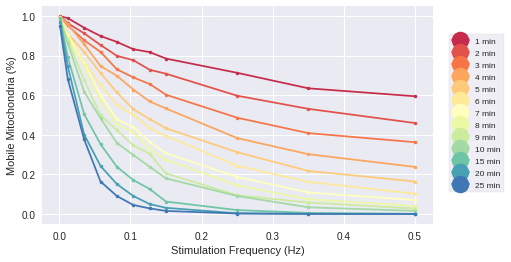

In [3]:
sns.set_palette("Spectral",13)
# Set color palette for plots
color_list = [tuple((np.array(x)+0.85)%1) for x in sns.color_palette("Spectral", num_runs)]
mean_times = [1,2,3,4,5,6,7,8,9,10,15,20,25]

fig = plt.figure()
fig.set_size_inches(7,4)
for ind, meantime in enumerate(mean_times):
    pct_imm = []
    key_imm = []
    dose_response = np.load('condition_{}/doseresponse.npy'.format(meantime)).item()
    for i in dose_response.keys():
        key_imm.append(float(i))
        pct_imm.append(dose_response[i])

    sorted_pct_imm = []
    sorted_keys = []
    for i in xrange(len(pct_imm)):
        sorted_keys.append(key_imm[np.argsort(key_imm)[i]])
        sorted_pct_imm.append(pct_imm[np.argsort(key_imm)[i]])
    
    plt.plot(sorted_keys, sorted_pct_imm, '.-', label='{} min'.format(meantime))#, color = color_list[ind])

plt.legend(bbox_to_anchor=(1.05, .8), bbox_transform=plt.gcf().transFigure, frameon=True, markerscale=5, fontsize='small',
labelspacing=.5)

#plt.tight_layout(rect=[0, 0, 1.1, 1])

plt.xlabel('Stimulation Frequency (Hz)')
plt.ylabel('Mobile Mitochondria (%)')
plt.savefig('doseresponse_compare.svg', format='svg')
plt.show()

plt.close()

In [4]:
## make table 
data = {}

for ind, meantime in enumerate(mean_times):
    pct_imm = []
    key_imm = []
    dose_response = np.load('condition_{}/doseresponse.npy'.format(meantime)).item()
    for i in dose_response.keys():
        key_imm.append(float(i))
        pct_imm.append(dose_response[i])

    sorted_pct_imm = []
    sorted_keys = []
    for i in xrange(len(pct_imm)):
        sorted_keys.append(key_imm[np.argsort(key_imm)[i]])
        sorted_pct_imm.append(pct_imm[np.argsort(key_imm)[i]])
    
    data['{}'.format(meantime)] = sorted_pct_imm
    
a = pd.DataFrame(data, index = sorted_keys)
cols = [str(i) for i in mean_times]
a = a[cols]

In [5]:
a.to_csv('dose_response_table.csv', sep=',')